In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from denn import *

In [ ]:
path = Path('../data/large')

In [ ]:
ab = pd.read_csv(path/'dC_01.csv', header=None).values[0]
bestKnow = pd.read_csv(path/'Best_Know1Fxs.csv', header=None).values[0]
bestKnow = bestKnow[:100].astype(float)
java_results = pd.read_csv(path/'Feasibility1Fs.csv', header=None).values[0]
java_results = java_results[:-1].astype(float)
java_results_all = pd.read_csv(path/'Feasibility1Fs.csv', header=None).iloc[:,:-1]

In [ ]:
D = 30
frequency = 1_000
max_times = len(ab)
total_generations = max_times * frequency + 1000

def fitness_func(indiv): return (indiv.data**2).sum()
def constraint_func(indiv, b): return -b + sum((1/np.sqrt(D))*indiv.data)

population = Population.new_random(dimension=D)
opt = Optimization(population, fitness_func, constraint_func, constraint_params=[ab],
                   max_times=max_times, frequency=frequency, callbacks=[DynamicConstraint,OnChangeRestartPopulation])
opt.state_dict

A proper report should be shown here :)
Total time: 00:15


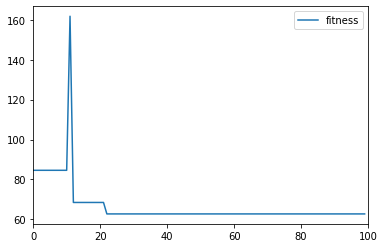

In [5]:
opt.run(total_generations)

In [7]:
df = pd.DataFrame({'java':java_results, 'bestKnow':bestKnow[:-1], 'results': opt.recorder.best_times_fitness[:-1]})
# df = pd.DataFrame({'java':java_results, 'bestKnow':bestKnow[:-1], 'results': opt.recorder.best_times_fitness[:-1],
#                    'results2': [e.fitness_value for e in opt.recorder.best_times2[:-1]]})

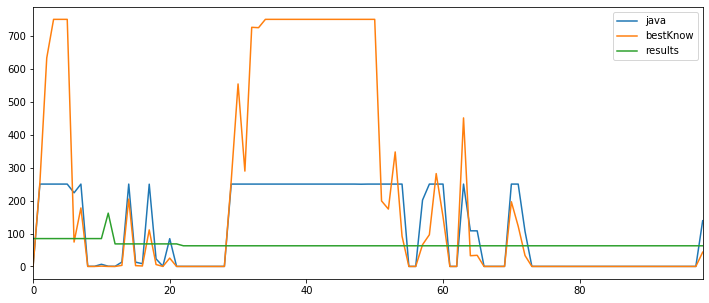

In [8]:
df.plot(figsize=(12,5))

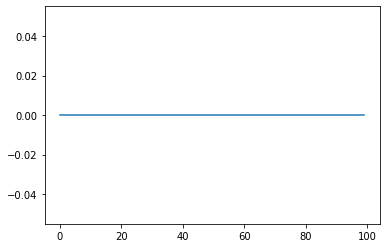

In [9]:
plt.plot([e.constraints_sum for e in opt.recorder.best_times])

In [12]:
opt.recorder.bests

[167.98383099292428,
 167.98383099292428,
 167.98383099292428,
 167.98383099292428,
 167.98383099292428,
 167.98383099292428,
 167.98383099292428,
 167.98383099292428,
 167.98383099292428,
 160.8961452148041,
 160.8961452148041,
 160.8961452148041,
 160.8961452148041,
 160.8961452148041,
 158.12419932473045,
 158.12419932473045,
 158.12419932473045,
 154.76846326330698,
 154.76846326330698,
 154.76846326330698,
 152.14389051163732,
 152.14389051163732,
 149.52471039296162,
 149.52471039296162,
 149.24298550626142,
 149.24298550626142,
 132.09353217067684,
 132.09353217067684,
 132.09353217067684,
 132.09353217067684,
 132.09353217067684,
 132.09353217067684,
 122.09165319445466,
 122.09165319445466,
 122.09165319445466,
 122.09165319445466,
 114.25298071851329,
 108.1903259536103,
 105.24585188234707,
 105.24585188234707,
 105.24585188234707,
 105.24585188234707,
 104.48900245177464,
 104.48900245177464,
 104.48900245177464,
 104.48900245177464,
 104.48900245177464,
 104.48900245177464

# Multiple runs

In [13]:
runs = (Optimization(population, fitness_func, constraint_func, constraint_params=[ab],
                     max_times=max_times, frequency=frequency, callbacks=[DynamicConstraint,OnChangeRestartPopulation])
        .create_multiple_runs(n_runs=20))

In [14]:
runs.run(total_generations)

Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.


Run cancelled: `max_time` reached.


Run cancelled: `max_time` reached.


Run cancelled: `max_time` reached.


Run cancelled: `max_time` reached.


Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.


Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.
Run cancelled: `max_time` reached.


In [15]:
runs.times_data

,run_1,run_2,run_3,run_4,run_5,run_6,run_7,run_8,run_9,run_10,run_11,run_12,run_13,run_14,run_15,run_16,run_17,run_18,run_19,run_20
0,100.038801,60.379284,110.421294,99.977745,97.082758,90.919458,115.127759,110.342714,114.353887,113.256073,95.639594,83.101232,82.564013,76.243986,98.469539,118.167818,88.754847,108.269185,111.670869,90.810040
1,100.038801,60.379284,110.421294,99.977745,391.760223,90.919458,115.127759,110.342714,114.353887,113.256073,95.639594,83.101232,82.564013,393.678181,98.469539,118.167818,88.754847,108.269185,111.670869,90.810040
2,100.038801,60.379284,110.421294,99.977745,391.760223,90.919458,115.127759,110.342714,114.353887,113.256073,95.639594,83.101232,82.564013,393.678181,98.469539,118.167818,88.754847,108.269185,111.670869,90.810040
3,100.038801,60.379284,110.421294,99.977745,391.760223,90.919458,115.127759,110.342714,114.353887,113.256073,95.639594,83.101232,82.564013,393.678181,98.469539,118.167818,88.754847,108.269185,111.670869,90.810040
4,100.038801,60.379284,110.421294,99.977745,391.760223,90.919458,115.127759,110.342714,114.353887,113.256073,95.639594,83.101232,82.564013,393.678181,98.469539,118.167818,88.754847,108.269185,111.670869,90.810040
5,100.038801,60.379284,110.421294,99.977745,391.760223,90.919458,115.127759,110.342714,114.353887,113.256073,95.639594,83.101232,82.564013,393.678181,98.469539,118.167818,88.754847,108.269185,111.670869,90.810040
6,100.038801,60.379284,110.421294,99.977745,207.483178,90.919458,115.127759,110.342714,114.353887,113.256073,95.639594,83.101232,82.564013,221.142481,98.469539,118.167818,88.754847,108.269185,111.670869,90.810040
7,100.038801,60.379284,110.421294,99.977745,207.483178,90.919458,115.127759,110.342714,114.353887,113.256073,95.639594,83.101232,82.564013,221.142481,98.469539,118.167818,88.754847,108.269185,111.670869,90.810040
8,98.209979,60.379284,101.771274,99.977745,83.279494,88.507521,84.023953,68.790561,91.646313,87.213696,71.905157,80.735044,58.366773,75.961251,98.469539,94.462348,56.989692,97.789125,66.910740,78.439100
9,90.165257,60.379284,101.771274,99.977745,83.279494,88.507521,84.023953,68.790561,80.491158,82.540277,71.905157,80.735044,58.366773,75.961251,95.785303,93.080749,56.989692,63.178210,108.526506,78.439100


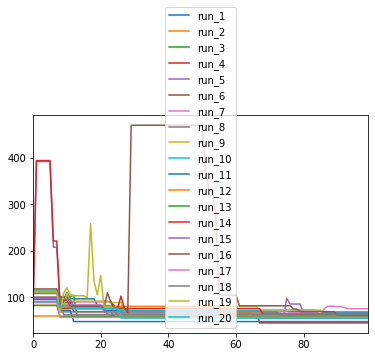

In [16]:
runs.times_data.plot();

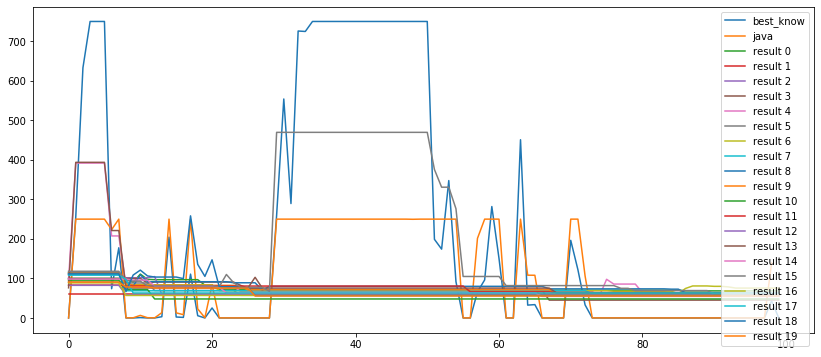

In [18]:
plt.figure(figsize=(14,6))
plt.plot(bestKnow, '-', label='best_know')
plt.plot(java_results, '-', label='java')
for i,opt in enumerate(runs.optimizations):
    plt.plot(opt.recorder.best_times_fitness, '-', label=f'result {i}')
plt.legend();

# --